# Numerical Integration

Literature:
 - Meister, Andreas u. Sonar, Thomas: Numerik. Eine lebendige und gut verständliche Einführung mit vielen Beispielen. Springer-Verlag GmbH Deutschland, 2019
 - https://www.mathi.uni-heidelberg.de/~thaeter/anasem08/Isenhardt.pdf
 - https://www.math.uni-hamburg.de/teaching/export/tuhh/cm/a2/07/vorl12_ana.pdf

## Basics

The goal is to find an approximation for some integral like the following: <br>
$I = \int_{a}^{b} f(x) \,dx$ <br>
To solve this problem we need the antiderivative of the given function: <br>
$F(x) = \int_{t_{0}}^{t} f(s) \,ds$ <br>
In real situations we can't compute this antiderivative. So the only opportunity is to calculate the integral numerically.

## Newton-Cotes formulas

The Newton-Cotes-formulas are a common and easy possibility to solve our problem numerically: <br>
$I \approx Q_{n+1}[f] = \dfrac{b-a}{n}\cdot \sum_{i=0}^n \alpha_{i} f(x_{i}) = h\cdot \sum_{i=0}^n \alpha_{i} f(x_{i})$ <br>
Meaning of the variables:<br>

| variable           | meaning                                |
|--------------------|----------------------------------------|
| $I$                | integral                               |
| $Q_{n+1}[f]$       | Newton-Cotes-rule                      |
| $a$                | lower integration boundary             |
| $b$                | upper integration boundary             |
| $n$                | number of subdivisions of the interval |
| $\alpha_{i}$       | Newton-Cotes-weights (see below)       |
| $f$                | given function                         |
| $h$                | step size: $h = \dfrac{b-a}{n}$        |
| $i$                | number with $ (i = 0, 1, ..., n) $     |

### Newton-Cotes weights

| n   | name             | nodes in x | weights                                                                            |
|-----|------------------|------------|------------------------------------------------------------------------------------|
| 1   | trapezoidal rule | 0 1        | $\dfrac{1}{2}$ $\dfrac{1}{2}$                                                      |
| 2   | Simpson-rule     | 0 $\dfrac{1}{2}$  1 | $\dfrac{1}{3}$ $\dfrac{4}{3}$ $\dfrac{1}{3}$                              |
| 3   | 3/8-rule         | 0 $\dfrac{1}{3}$  $\dfrac{2}{3}$  1 | $\dfrac{3}{8}$ $\dfrac{9}{8}$ $\dfrac{9}{8}$ $\dfrac{3}{8}$|
| ... | ...              | ...                                                                                             |

Remark: Already implemented in SciPy. But if you really want to understand, what the formulas do, do it yourself!<br><br>
(source: Meister, Andreas u. Sonar, Thomas: Numerik. Eine lebendige und gut verständliche Einführung mit vielen Beispielen. Springer-Verlag GmbH Deutschland, 2019)

## The trapezoidal rule in Python 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

### Some function to be integrated

$\rightarrow $ integral = surface below the graph

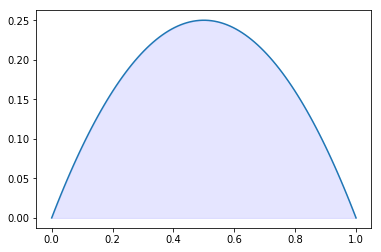

In [2]:
x1 = np.linspace( 0, 1, 100 ) # x values
f1 = -(x1-0.5)**2 + .25       # y values by any function

plt.plot(x1,f1)
plt.fill_between(x1, f1, color="b", alpha=.1)
plt.show()

### Integration with one trapezium

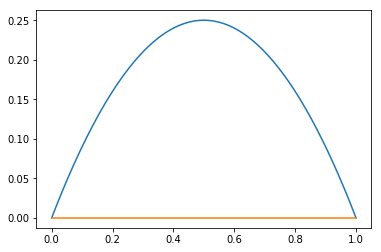

In [46]:
x1 = np.linspace( 0, 1, 100 )
f1 = -(x1-0.5)**2 + .25

end = len(x1)-1

x_values = [x1[0], x1[end]]
y_values = [f1[0], f1[end]]

plt.plot(x1,f1)
plt.plot(x_values, y_values)
plt.fill_between(x_values, y_values, color="r", alpha=.1)
plt.show()

integration: 
 - take starting and ending point
 - join them by straigt line
 - calculate surface of trapezium under line
<br>$\rightarrow $ Here: both = 0 $\rightarrow $ no surface! <br>
$\rightarrow $ subdivide interval!

### Integration with two trapezia

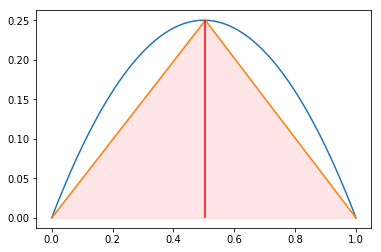

In [3]:
x1 = np.linspace( 0, 1, 100 )
f1 = -(x1-0.5)**2 + .25

end = len(x1)-1
middle = 50

x_values = [x1[0], x1[middle], x1[end]]
y_values = [f1[0], f1[middle], f1[end]]

plt.plot(x1,f1)
plt.plot(x_values, y_values)
plt.axvline(x1[50], ymin=0.05, ymax=.95, color="r")
plt.fill_between(x_values, y_values, color="r", alpha=.1)
plt.show()

result: difference between trapezia and graph quite big! <br>
$\rightarrow $ more subdivision!

Remark: now calculation over interval as sum of several trapezia $\rightarrow $ "compound trapezoidal rule"

### Integration with more trapezia

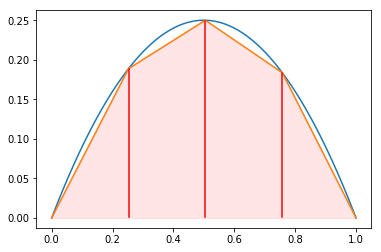

In [4]:
x1 = np.linspace( 0, 1, 100 )
f1 = -(x1-0.5)**2 + .25

end = len(x1)-1

x_values = [x1[0], x1[25], x1[50], x1[75], x1[end]]
y_values = [f1[0], f1[25], f1[50], f1[75], f1[end]]

plt.plot(x1,f1)
plt.plot(x_values, y_values)
plt.fill_between(x_values, y_values, color="r", alpha=.1)

plt.axvline(x1[25], ymin=0.05, ymax=.73, color="r")
plt.axvline(x1[50], ymin=0.05, ymax=.95, color="r")
plt.axvline(x1[75], ymin=0.05, ymax=.71, color="r")

plt.show()

$\rightarrow $ result becomes better

### Trapezoidal rule based on graphical imagination

Check our result by taking a function with known result: <br>
$\Large\int_{0}^{1} \normalsize\dfrac{1}{1+x^2} \,dx = arctan(1) - arctan(0) = \dfrac{1}{4} \pi$

#### Some important functions

In [5]:
from numpy import pi

def TrapeziumSurface( a,c,h ):
    A = 0.0
    A = 0.5 * ( a + c ) * h
    return A

def f(x):
    y = 1 / (1 + x*x)
    return y


In [7]:
x = 0.0
dx = 0.001
ya = 0.0
yb = 0.0
trapezium = 0.0
trapezium_sum = 0.0
pi_computed = 0.0
error = 0.0
while (x <= 1):
    ya = f(x)
    x = x + dx
    yb = f(x)
    trapezium = TrapeziumSurface(ya, yb, dx)
    trapezium_sum = trapezium + trapezium_sum
    
pi_computed = trapezium_sum * 4

print ("Pi is around: ", pi_computed)
print ("The error is: ", (np.pi-pi_computed))

Pi is around:  3.141592486923127
The error is:  1.6666666624587378e-07


### Errors depending on subdivisions

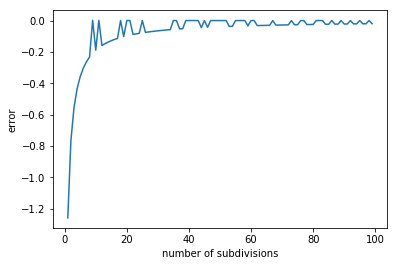

In [8]:
#boundaries:
a = 0.0
b = 1.0

subdivisions = list()
errors = list()

for n in range(1,100):
    x = a
    dx = (b-a)/n
    ya = 0.0
    yb = 0.0
    trapezium = 0.0
    trapezium_sum = 0.0
    pi_comp = 0.0
    error = 0.0
    
    while (x <= b):
        ya = f(x)
        x = x + dx
        yb = f(x)
        trapezium = TrapeziumSurface(ya, yb, dx)
        trapezium_sum = trapezium + trapezium_sum
    
    pi_comp = trapezium_sum * 4
    error = np.pi - pi_comp
    subdivisions.append(n)
    errors.append(error)

fig, ax = plt.subplots()
plt.plot(subdivisions,errors)
ax.set_xlabel("number of subdivisions")
ax.set_ylabel("error")
plt.show()

- in theory: smooth graph
- in reality: peaks caused by smallest printable number on a computer $\rightarrow $ don't forget!

### Trapezoidal rule based on formulas

Formula for the trapezoidal rule: <br>
$F_{N}(f) = \dfrac{\Delta x}{2}\cdot \Large\sum_{i=1}^{N}\normalsize (f(x_{i}) + f(x_{i-1}))$

In [9]:
def trapz(f,a,b,N=50):
    
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable like f(x)
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

(source for formula and source code: https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/)

In [12]:
result = trapz(np.sin,0,np.pi/2,1000)
print("Result:", result)
print("Error:", 1.0-result)

Result: 0.9999997943832332
Error: 2.056167668351705e-07


### Trapezoidal rule with Python modules

The functions expect array-like objects as input. We need to define them.

In [38]:
n = 1000
x = np.linspace( 0, np.pi/2, n )
dx = np.pi/(2*n)
f_sin = np.sin(x)

#### Trapezoidal rule with NumPy

In [39]:
result = np.trapz( f_sin, dx = dx )
print("Result:", result)
print("Error:", 1.0-result)

Result: 0.9989997941774106
Error: 0.0010002058225894173


#### Trapezoidal rule with SciPy

In [40]:
result = scipy.integrate.trapz( f_sin, dx = dx )
print("Result:", result)
print("Error:", 1.0-result)

Result: 0.9989997941774106
Error: 0.0010002058225894173


## Simpson's rule

Formula for Simpson's rule: <br>
$S_{N}(f) = \dfrac{\Delta x}{3}\cdot \Large\sum_{i=1}^{N/2}\normalsize (f(x_{2i-2}) + 4f(x_{2i-1}) + f(x_{2i}))$

In [44]:
def simps(f,a,b,N=50):
    
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]; by default 50

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

(source for formula and cource code: https://www.math.ubc.ca/~pwalls/math-python/integration/simpsons-rule/)

In [45]:
result = simps(np.sin,0,np.pi/2,100)
print(result)

1.000000000338236


### Simpson's rule with SciPy

In [42]:
result = scipy.integrate.simps( f_sin, dx = dx )
print("Result:", result)
print("Error:", 1.0-result)

Result: 0.9989999998380923
Error: 0.0010000001619077103


## Some additional words

- It is possible to calculate the maximum error of any Newton-Cotes formula depending on step size and the function to be integrated.
- Feel free to modify this script, try out the other Newton-Cotes-formulas or your own ideas!